In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 5]
sns.set()

In [34]:
train = pd.merge(
    pd.read_csv('data/train_bodies.csv'),
    pd.read_csv('data/train_stances.csv'),
    on='Body ID',
    how='left'
)
train.head()

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated


### Let's check how example _bodies_ and _headlines_ look like.

In [35]:
for i in range(5):
    print(train["articleBody"][i])
    print('--------')

A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday. Residents reported hearing a mysterious boom that left a 16-foot deep crater near the city's airport, the Associated Press reports. 

Government spokeswoman Rosario Murillo said a committee formed by the government to study the event determined it was a "relatively small" meteorite that "appears to have come off an asteroid that was passing close to Earth." House-sized asteroid 2014 RC, which measured 60 feet in diameter, skimmed the Earth this weekend, ABC News reports. 
Murillo said Nicaragua will ask international experts to help local scientists in understanding what happened.

The crater left by the meteorite had a radius of 39 feet and a depth of 16 feet,  said Humberto Saballos, a volcanologist with the Nicaraguan Institute of Territorial Studies who was on the committee. He said it is still not clear if the meteorite disintegrated or was buried.

Humberto Garcia

In [36]:
for i in range(10):
    print(train["Headline"][i])

Soldier shot, Parliament locked down after gunfire erupts at war memorial
Tourist dubbed ‘Spider Man’ after spider burrows under skin for days
Luke Somers 'killed in failed rescue attempt in Yemen'
BREAKING: Soldier shot at War Memorial in Ottawa
Giant 8ft 9in catfish weighing 19 stone caught in Italy is thought to be the biggest ever reeled in with a rod and line
Enormous 20-stone catfish caught with fishing rod in Italy after 40-minute boat battle
Italian catches huge wels catfish; is it a record?
Not coming to a store near you: The pumpkin spice condom
One gunman killed in shooting on Parliament Hill in Ottawa, hunt on for other shooters
Soldier shot at war memorial in Canada


### Class distribution

In [37]:
(train.groupby('Stance')['Stance'].count() / len(train)).round(2)

Stance
agree        0.07
disagree     0.02
discuss      0.18
unrelated    0.73
Name: Stance, dtype: float64

We should take into account that the data is imbalanced and in this task we want to focus on minority classes (`agree`, `discuss` and `disagree`).

### Length of headline distribution

#### Characters

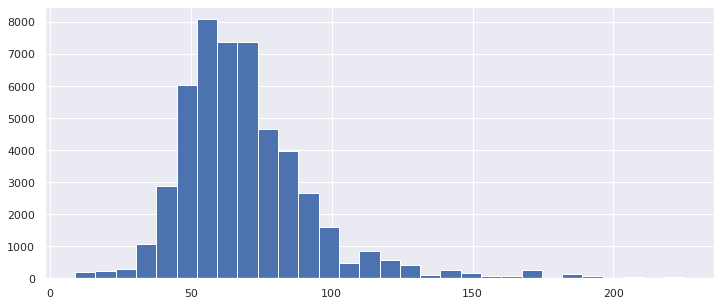

Mean: 69.35685984151125
Median: 65.0


In [38]:
lens = train['Headline'].str.len()
lens.hist(bins=30)
plt.show()
print(f"Mean: {lens.mean()}\nMedian: {lens.median()}")

#### Words

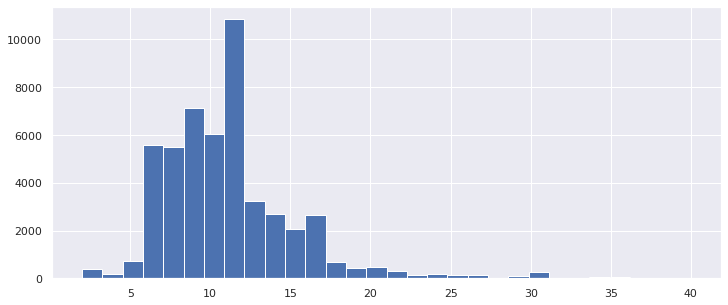

Mean: 11.12647082366125
Median: 10.0


In [39]:
lens = train['Headline'].str.split().apply(lambda x: len(x))
lens.hist(bins=30)
plt.show()
print(f"Mean: {lens.mean()}\nMedian: {lens.median()}")

### Length of body distribution

#### Characters

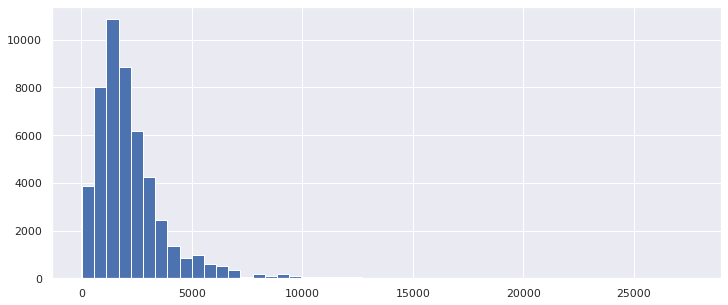

Mean: 2207.547266469223
Median: 1824.0


In [40]:
lens = train['articleBody'].str.len()
lens.hist(bins=50)
plt.show()
print(f"Mean: {lens.mean()}\nMedian: {lens.median()}")

#### Words

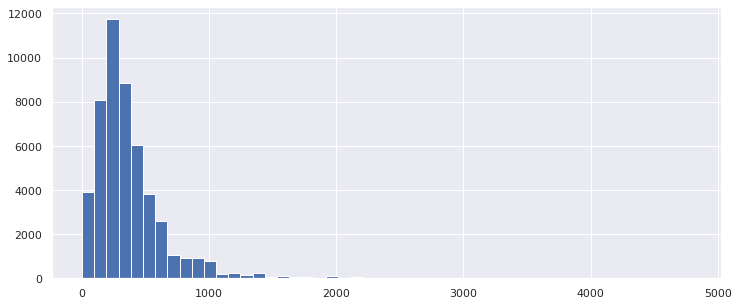

Mean: 369.7017129592572
Median: 304.0


In [41]:
lens = train['articleBody'].str.split().apply(lambda x: len(x))
lens.hist(bins=50)
plt.show()
print(f"Mean: {lens.mean()}\nMedian: {lens.median()}")